In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

#packages for EDA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set()

#packages for model development
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
from sklearn import linear_model

In [131]:
import plotly
import plotly.plotly as py

In [4]:
plotly.tools.set_credentials_file(username='hsingh29320', api_key='g5LPqUCukdjHa2GqC2rh')


In [3]:
#get excel file using url
xl = pd.ExcelFile ("C:/Users/harshvardhan/Dropbox/Springboard/Story/August2015.xls")
#xl= pd.ExcelFile("C:/Users/270168/Downloads/personal/Sample_codes-master/Sample_codes-master/August2015.xls")

In [9]:
xl2= pd.ExcelFile("C:/Users/270168/Downloads/personal/Sample_codes-master/population_WIC.xlsx")

In [4]:

df_code = pd.read_csv("C:/Users/harshvardhan/Dropbox/Springboard/Story/code.csv")
#df_code= pd.read_csv("C:/Users/270168/Downloads/personal/Sample_codes-master/2011_us_ag_exports.csv")

In [5]:
df_code.head()

,Unnamed: 0,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [11]:
#parse sheet of data dictionary
data_dict = xl.parse('Supplemental Data - State')

In [12]:
data_rest = xl.parse('RESTAURANTS')

In [13]:
data_health = xl.parse('HEALTH')

In [9]:
#check head of the data dictionary
data_dict.head(10)

,State,WIC participants FY 2009,WIC participants FY 2011,"WIC participants, FY 2012","WIC participants, FY 2013","WIC participants, FY 2014",National School Lunch Program participants FY 2009,National School Lunch Program participants FY 2011,"National School Lunch Program participants, FY 2012","National School Lunch Program participants, FY 2013",...,"Summer Food participants, FY 2012","Summer Food participants, FY 2013","Summer Food participants, FY 2014","State Population, 2008","State Population, 2009","State Population, 2010","State Population, 2011","State Population, 2012","State Population, 2013","State Population, 2014"
0,Alabama,140810.0,143768.0,141900.0,1.390005e+05,1.310462e+05,579880.0,571291.0,562959.0,539664,...,26423.0,30308.0,42369.0,4677464.0,4708708.0,4785401.0,4802740.0,4817528.0,4833722.0,4849377.0
1,Alaska,25816.0,26295.0,24969.0,2.305467e+04,2.010658e+04,53554.0,54410.0,53920.0,52495,...,4661.0,5078.0,6670.0,688125.0,698473.0,714146.0,722718.0,730307.0,735132.0,736732.0
2,Arizona,208873.0,199343.0,193214.0,1.825008e+05,1.729551e+05,655498.0,661437.0,662564.0,646946,...,27554.0,23688.0,23231.0,6499377.0,6595778.0,6413158.0,6482505.0,6551149.0,6626624.0,6731484.0
3,Arkansas,94107.0,93461.0,94293.0,8.977683e+04,8.326325e+04,351950.0,352818.0,348909.0,332497,...,26217.0,41946.0,45837.0,2867764.0,2889450.0,2921588.0,2937979.0,2949828.0,2959373.0,2966369.0
4,California,1439006.0,1466564.0,1472468.0,1.431881e+06,1.349419e+06,3175063.0,3281699.0,3333410.0,3.29118e+06,...,104428.0,114691.0,115841.0,36580371.0,36961664.0,37338198.0,37691912.0,37999878.0,38332521.0,38802500.0
5,Colorado,107930.0,104129.0,103769.0,9.687358e+04,9.199092e+04,390868.0,399393.0,389955.0,375023,...,16646.0,17933.0,19076.0,4935213.0,5024748.0,5047692.0,5116796.0,5189458.0,5268367.0,5355866.0
6,Connecticut,60148.0,56083.0,56584.0,5.424817e+04,5.256075e+04,302997.0,301545.0,296699.0,280253,...,10185.0,12171.0,17274.0,3502932.0,3518288.0,3575498.0,3580709.0,3591765.0,3596080.0,3596677.0
7,Delaware,24028.0,22553.0,22214.0,2.079692e+04,1.981308e+04,90073.0,94722.0,96040.0,94570.8,...,14366.0,8190.0,7018.0,876211.0,885122.0,899792.0,907135.0,917053.0,925749.0,935614.0
8,District of Columbia,17473.0,16537.0,16474.0,1.567425e+04,1.450050e+04,44579.0,46699.0,47735.0,50501.6,...,36158.0,34778.0,39449.0,590074.0,599657.0,604912.0,617996.0,633427.0,646449.0,658893.0
9,Florida,505671.0,492071.0,495405.0,4.835647e+05,4.704076e+05,1560392.0,1648792.0,1653935.0,1.63878e+06,...,137796.0,145389.0,155455.0,18423878.0,18537969.0,18838613.0,19057542.0,19320749.0,19552860.0,19893297.0


In [10]:
df = data_dict

In [10]:
for col in df:
    df[col] = df[col].astype(str)

In [11]:
df.columns

Index(['State   ', 'WIC participants FY 2009', 'WIC participants FY 2011',
       'WIC participants, FY 2012', 'WIC participants, FY 2013',
       'WIC participants, FY 2014',
       'National School Lunch Program participants FY 2009',
       'National School Lunch Program participants FY 2011',
       'National School Lunch Program participants, FY 2012',
       'National School Lunch Program participants, FY 2013',
       'National School Lunch Program participants, FY 2014',
       'School Breakfast Program participants FY 2009',
       'School Breakfast Program participants FY 2011',
       'School Breakfast Program participants, FY 2012',
       'School Breakfast Program participants, FY 2013',
       'School Breakfast Program participants, FY 2014',
       'Child and Adult Care particpants FY 2009',
       'Child and Adult Care particpants FY 2011',
       'Child and Adult Care participants, FY 2012',
       'Child and Adult Care participants, FY 2013',
       'Child and Adult C

In [13]:
df = df.drop(df.index[51])

In [14]:
df2 = pd.merge(df, df_code, how='inner', left_on='State', right_on='state')

NameError: name 'df_code' is not defined

In [35]:
color_scl = [[0.1, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [36]:
df1_1['info'] = df1_1['STABBR'] + '<br>'+ df1_1["Number of Colleges"]

NameError: name 'df1_1' is not defined

In [77]:
data = [ dict(
        type='choropleth',
        colorscale = color_scl,
        autocolorscale = False,
        locations = df2['code'],
        z = df["State Population, 2009"].astype(float),
        locationmode = 'USA-states',
        text = '',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Population 2009")
        ) ]

In [78]:

layout = dict(
        title = 'US population 2009 by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

In [79]:
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hsingh29320/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [69]:
data1 = [ dict(
        type='choropleth',
        colorscale = color_scl,
        autocolorscale = False,
        locations = df2['code'],
        z = df["State Population,  2014"].astype(float),
        locationmode = 'USA-states',
        text = '',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Population 2014")
        ) ]

In [71]:
layout1 = dict(
        title = 'US population 2014 by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

In [72]:
fig = dict( data=data1, layout=layout1 )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hsingh29320/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [85]:
df["population change"] = ((df["State Population,  2014"] - df["State Population, 2009"]))
df["WIC participants change"] = ((df["WIC participants, FY 2014"] - df["WIC participants FY 2009"]))
df["% population rate change"] = ((df["State Population,  2014"] - df["State Population, 2009"])/df["State Population, 2009"]) *  100
df["% WIC participants rate change"] = ((df["WIC participants, FY 2014"] - df["WIC participants FY 2009"])/df["WIC participants FY 2009"]) *  100

In [112]:
#WIC generic name
years = ['2008','2009','2010']
WIC_name = []
df_new =pd.DataFrame

year = '2009'
WIC_name = 'WIC'+ '*' + year
print(WIC_name)

WIC_cols = [col for col in df.columns if WIC_name in col]
print(list(WIC_cols))
#for year in years:
#    WIC_name = 'WIC'+ '*' + year
#    if df.columns == WIC_name:
#        df_new['WIC'] = df[df[WIC_name == year]]
#        df_new['year'] = year
#df_new.head()


WIC*2009
[]


In [371]:
df_pop_wic= xl2.parse('Sheet1')
df_pop_wic['Population_tens_thousands'] = df_pop_wic['population'] / 10000
df_pop_wic['WIC_thousands'] = df_pop_wic['WIC'] / 1000

In [372]:
df_pop_wic.head()

,population,WIC,Child_and_adult_care_participants,year,Population_tens_thousands,WIC_thousands
Alabama,4708708,140810.0,43136.0,2009,470.8708,140.810
Alaska,698473,25816.0,9874.0,2009,69.8473,25.816
Arizona,6595778,208873.0,45772.0,2009,659.5778,208.873
Arkansas,2889450,94107.0,43974.0,2009,288.9450,94.107
California,36961664,1439006.0,327838.0,2009,3696.1664,1439.006


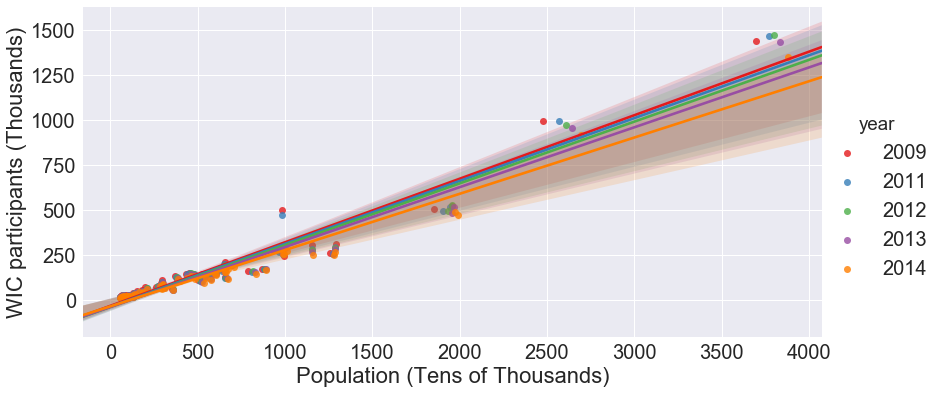

In [378]:

sns.set(font_scale=2, style='darkgrid') 
g = sns.lmplot(x="Population_tens_thousands", y="WIC_thousands", hue="year", size=6, aspect=2, data=df_pop_wic,  palette="Set1")
g = (g.set_axis_labels("Population (Tens of Thousands)", "WIC participants (Thousands)"))


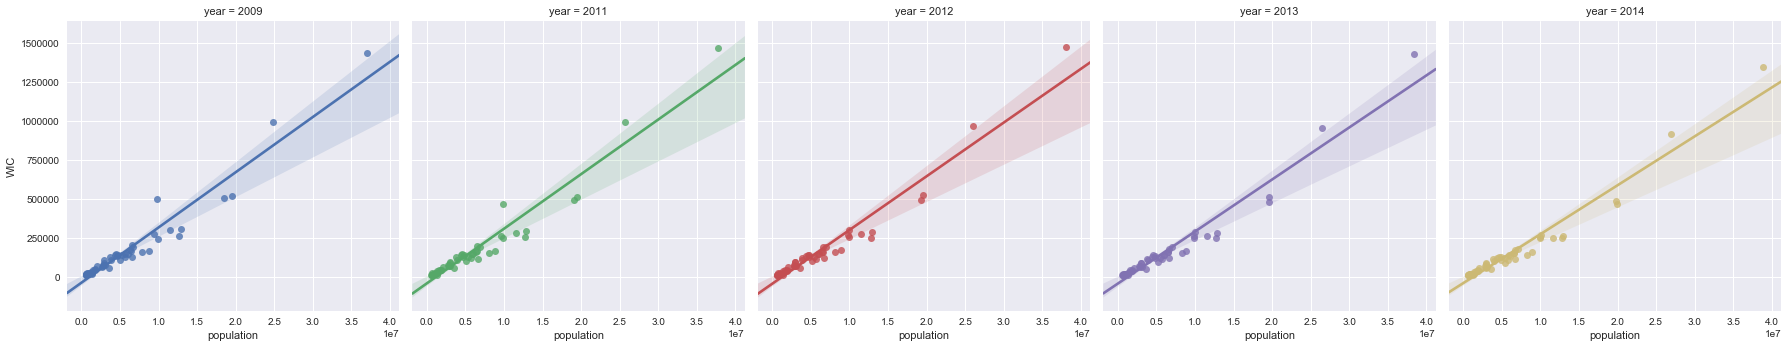

In [346]:
sns.lmplot(x="population", y="WIC", hue="year", col="year",data=df_pop_wic)

In [128]:
fig = {
    'data': [
        {
            'x': df_pop_wic[df_pop_wic['year']==year]['population'],
            'y': df_pop_wic[df_pop_wic['year']==year]['WIC'],
            'name': year, 'mode': 'markers',
        } for year in [2009, 2011, 2012, 2013]
    ],
    'layout': {
        'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
        'yaxis': {'title': "Life Expectancy"}
    }
}


In [130]:
fig2 = go.Figure(data=data, layout=layout)
py.plot(fig2)

PlotlyRequestError: No message

In [14]:
print("Average change in population from 2009 to 2014 was {}".format(df["% population rate change"].mean()))
print("Max change in population from 2009 to 2014 was {}".format(df["% population rate change"].max()))
#df["% population rate change"].max()
#df["% population rate change"].min()

Average change in population from 2009 to 2014 was 4.021478526679708
Max change in population from 2009 to 2014 was 14.321536568322502


In [23]:
df.iloc[:,0][df["% population rate change"].idxmax()]

'North Dakota'

According to the data the population of most states have gone up with overall average of about 4%. North Dakota is the state with highest increase of around 14.3%. So we can say that the overall the population of United States has increased slightly. 

Now we gathered data for different states on the health and resturants. We merged both datasets and following is the results.

In [24]:
data_rest.head()

,FIPS,State,County,FFR07,FFR12,PCH_FFR_07_12,FFRPTH07,FFRPTH12,PCH_FFRPTH_07_12,FSR07,FSR12,PCH_FSR_07_12,FSRPTH07,FSRPTH12,PCH_FSRPTH_07_12,PC_FFRSALES02,PC_FFRSALES07,PC_FSRSALES02,PC_FSRSALES07
0,1001,AL,Autauga,32.0,34,6.250000,0.642132,0.612458,-4.621132,34.0,29,-14.705882,0.682265,0.522391,-23.432881,470.0,649.511367,349.0,484.381507
1,1003,AL,Baldwin,129.0,130,0.775194,0.746463,0.681377,-8.719193,184.0,211,14.673913,1.064722,1.105928,3.870079,470.0,649.511367,349.0,484.381507
2,1005,AL,Barbour,20.0,21,5.000000,0.672585,0.772030,14.785486,11.0,14,27.272727,0.369922,0.514687,39.133922,470.0,649.511367,349.0,484.381507
3,1007,AL,Bibb,8.0,6,-25.000000,0.372353,0.265522,-28.690755,8.0,4,-50.000000,0.372353,0.177015,-52.460504,470.0,649.511367,349.0,484.381507
4,1009,AL,Blount,27.0,22,-18.518519,0.474800,0.380452,-19.871236,14.0,13,-7.142857,0.246193,0.224812,-8.684428,470.0,649.511367,349.0,484.381507


In [25]:
data_rest_2 = data_rest.groupby(['State']).agg({'FFR07':['sum'], 'FFR12':['sum'], 'PCH_FFR_07_12':['mean']})

In [26]:
data_rest_2.columns = [' '.join(col).strip() for col in data_rest_2.columns.values]

In [27]:
data_rest_2 = data_rest_2.reset_index()

In [28]:
data_rest_2.head()

,State,FFR07 sum,FFR12 sum,PCH_FFR_07_12 mean
0,AK,401.0,409,-9.139795
1,AL,3483.0,3482,-2.317248
2,AR,1850.0,1978,7.349946
3,AZ,4046.0,4238,0.450318
4,CA,26138.0,27758,-0.513431


In [29]:
data_rest_2["PCH_FFR_07_12 mean"].max()

12.891439124126107

In [30]:
data_rest_2['State'][data_rest_2["PCH_FFR_07_12 mean"].idxmax()]

'DE'

In [31]:
data_rest_2[data_rest_2['State']=='DE']

,State,FFR07 sum,FFR12 sum,PCH_FFR_07_12 mean
8,DE,585.0,642,12.891439


In [32]:
data_health_2 = data_health.groupby(['State']).agg({'PCT_DIABETES_ADULTS09':['mean'], 'PCT_DIABETES_ADULTS10':['mean'], 
                                                    'PCT_OBESE_ADULTS09':['mean'], 'PCT_OBESE_ADULTS10':['mean'], 
                                                    'PCT_OBESE_ADULTS13':['mean']})

In [33]:
data_health_2.columns = [' '.join(col).strip() for col in data_health_2.columns.values]

In [34]:
data_health_2 = data_health_2.reset_index()

In [35]:
data_health_2['PCT_CHNG_OBESE_ADULT_09_13'] = (data_health_2['PCT_OBESE_ADULTS13 mean'] - data_health_2['PCT_OBESE_ADULTS09 mean'])/data_health_2['PCT_OBESE_ADULTS09 mean']*100

In [36]:
data_health_2.head()

,State,PCT_DIABETES_ADULTS09 mean,PCT_DIABETES_ADULTS10 mean,PCT_OBESE_ADULTS09 mean,PCT_OBESE_ADULTS10 mean,PCT_OBESE_ADULTS13 mean,PCT_CHNG_OBESE_ADULT_09_13
0,AK,6.629167,7.262500,30.833333,29.883333,28.4,-7.891892
1,AL,13.897015,14.082090,35.126866,35.082090,32.4,-7.762906
2,AR,11.913333,12.454667,33.177333,33.616000,34.6,4.288068
3,AZ,9.960000,10.080000,27.780000,27.806667,26.8,-3.527718
4,CA,7.929310,8.077586,24.660345,24.218966,24.1,-2.272251


In [37]:
df_rest_health = pd.merge(data_rest_2, data_health_2, how='inner', left_on='State', right_on='State')

In [38]:
df_rest_health.head()

,State,FFR07 sum,FFR12 sum,PCH_FFR_07_12 mean,PCT_DIABETES_ADULTS09 mean,PCT_DIABETES_ADULTS10 mean,PCT_OBESE_ADULTS09 mean,PCT_OBESE_ADULTS10 mean,PCT_OBESE_ADULTS13 mean,PCT_CHNG_OBESE_ADULT_09_13
0,AK,401.0,409,-9.139795,6.629167,7.262500,30.833333,29.883333,28.4,-7.891892
1,AL,3483.0,3482,-2.317248,13.897015,14.082090,35.126866,35.082090,32.4,-7.762906
2,AR,1850.0,1978,7.349946,11.913333,12.454667,33.177333,33.616000,34.6,4.288068
3,AZ,4046.0,4238,0.450318,9.960000,10.080000,27.780000,27.806667,26.8,-3.527718
4,CA,26138.0,27758,-0.513431,7.929310,8.077586,24.660345,24.218966,24.1,-2.272251


In [39]:
df2_rest_health = df_rest_health.drop(df_rest_health['PCT_CHNG_OBESE_ADULT_09_13'].idxmax())

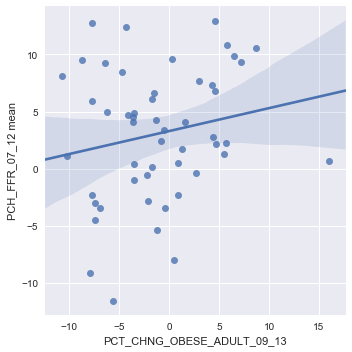

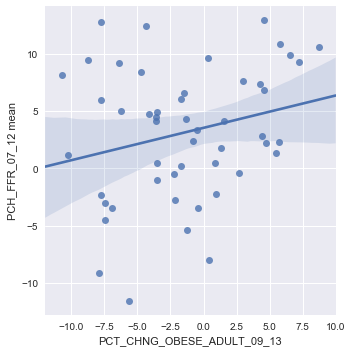

In [40]:
sns.lmplot(x='PCT_CHNG_OBESE_ADULT_09_13', y='PCH_FFR_07_12 mean', data=df_rest_health)
sns.lmplot(x='PCT_CHNG_OBESE_ADULT_09_13', y='PCH_FFR_07_12 mean', data=df2_rest_health)

In [31]:
df_rest_health['PCH_FFR_07_12 mean'][df_rest_health['PCH_FFR_07_12 mean'] < 0.0].count()

14

While most of the states had increase in number of fast food resturants, only 14 states observed a decrease in number of fast food resturants.

In [32]:
lm = linear_model.LinearRegression()
x1 = df_rest_health['PCT_CHNG_OBESE_ADULT_09_13'].values.reshape(-1, 1)
y1 = df_rest_health['PCH_FFR_07_12 mean'].values.reshape(-1, 1)
model = lm.fit(x1, y1)

In [33]:
print(model.score(x1, y1))
print(model.coef_)
print(model.intercept_)

0.03723154234173154
[[0.20034005]]
[3.29656343]


In [46]:
print(df_rest_health['State'][df_rest_health['PCT_CHNG_OBESE_ADULT_09_13'].idxmax()])
print(df_rest_health['PCT_CHNG_OBESE_ADULT_09_13'].max())

RI
15.972812234494485


As we observed from the graph, there was no significant correlation between percentage of growth in fast food resturant and the percentage of adult obesity. Interestingly, Rhode Island has the largest increase in the percentage of obesity since 2009. Rhode Island is a small state with the population of 1,053,209 in 2009 which has been declining and it had reduced to 1,051,511

In [41]:
lm = linear_model.LinearRegression()
x2 = df2_rest_health['PCT_CHNG_OBESE_ADULT_09_13'].values.reshape(-1, 1)
y2 = df2_rest_health['PCH_FFR_07_12 mean'].values.reshape(-1, 1)
model2 = lm.fit(x2, y2)

In [42]:
print(model2.score(x2, y2))
print(model2.coef_)
print(model2.intercept_)

0.05983900676689969
[[0.28233332]]
[3.53214509]


In [45]:
df.head()

,State,WIC participants FY 2009,WIC participants FY 2011,"WIC participants, FY 2012","WIC participants, FY 2013","WIC participants, FY 2014",National School Lunch Program participants FY 2009,National School Lunch Program participants FY 2011,"National School Lunch Program participants, FY 2012","National School Lunch Program participants, FY 2013",...,"Summer Food participants, FY 2014","State Population, 2008","State Population, 2009","State Population, 2010","State Population, 2011","State Population, 2012","State Population, 2013","State Population, 2014",% population rate change,% WIC participants rate change
0,Alabama,140810.0,143768.0,141900.0,1.390005e+05,1.310462e+05,579880.0,571291.0,562959.0,539664,...,42369.0,4677464.0,4708708.0,4785401.0,4802740.0,4817528.0,4833722.0,4849377.0,2.987422,-6.933989
1,Alaska,25816.0,26295.0,24969.0,2.305467e+04,2.010658e+04,53554.0,54410.0,53920.0,52495,...,6670.0,688125.0,698473.0,714146.0,722718.0,730307.0,735132.0,736732.0,5.477520,-22.115807
2,Arizona,208873.0,199343.0,193214.0,1.825008e+05,1.729551e+05,655498.0,661437.0,662564.0,646946,...,23231.0,6499377.0,6595778.0,6413158.0,6482505.0,6551149.0,6626624.0,6731484.0,2.057468,-17.196055
3,Arkansas,94107.0,93461.0,94293.0,8.977683e+04,8.326325e+04,351950.0,352818.0,348909.0,332497,...,45837.0,2867764.0,2889450.0,2921588.0,2937979.0,2949828.0,2959373.0,2966369.0,2.662064,-11.522788
4,California,1439006.0,1466564.0,1472468.0,1.431881e+06,1.349419e+06,3175063.0,3281699.0,3333410.0,3.29118e+06,...,115841.0,36580371.0,36961664.0,37338198.0,37691912.0,37999878.0,38332521.0,38802500.0,4.980393,-6.225611


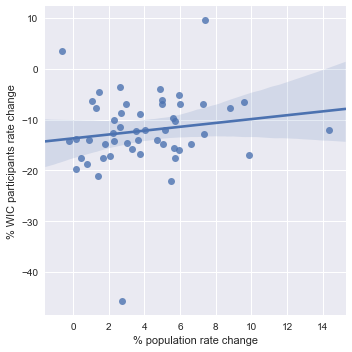

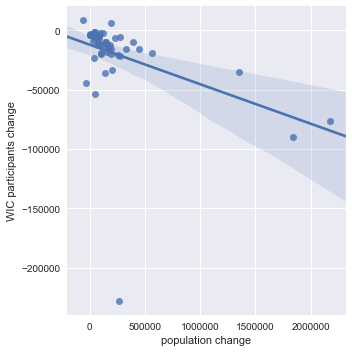

In [87]:
sns.lmplot(x='% population rate change', y='% WIC participants rate change', data=df)
sns.lmplot(x='population change', y='WIC participants change', data=df)

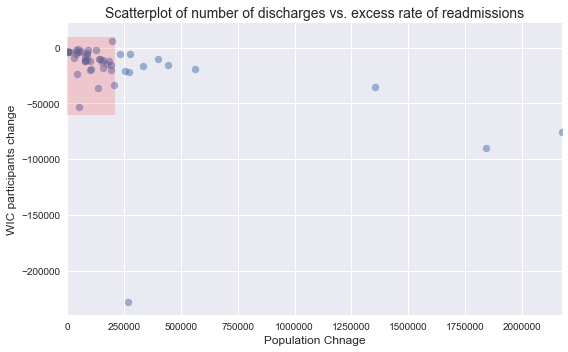

In [97]:
x= df['population change']
y=df['WIC participants change']
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.5)

ax.fill_between([0,210000], -60000, 10000, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([1250000,2500000], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Population Chnage', fontsize=12)
ax.set_ylabel('WIC participants change', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 35 columns):
State                                                  51 non-null object
WIC participants FY 2009                               51 non-null float64
WIC participants FY 2011                               51 non-null float64
WIC participants, FY 2012                              51 non-null float64
WIC participants, FY 2013                              51 non-null float64
WIC participants, FY 2014                              51 non-null float64
National School Lunch Program participants FY 2009     51 non-null float64
National School Lunch Program participants FY 2011     51 non-null float64
National School Lunch Program participants, FY 2012    51 non-null float64
National School Lunch Program participants, FY 2013    52 non-null object
National School Lunch Program participants, FY 2014    52 non-null object
School Breakfast Program participants FY 2009          51 non-null float64


In [51]:
#lm = linear_model.LinearRegression()
#x3 = df['% population rate change'].values.reshape(-1, 1)
#y3 = df['% WIC participants rate change'].values.reshape(-1, 1)
#model3 = lm.fit(x3, y3)

In [14]:
df_rest_health3 = pd.merge(data_rest, data_health, how='inner', left_on=['State', 'County'], right_on=['State', 'County'])

In [15]:
df_RI= df_rest_health3[df_rest_health3['State'] == 'RI']

In [16]:
df_RI.head()

,FIPS_x,State,County,FFR07,FFR12,PCH_FFR_07_12,FFRPTH07,FFRPTH12,PCH_FFRPTH_07_12,FSR07,...,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN
2412,44001,RI,Bristol,30.0,30,0.000000,0.600252,0.610451,1.699088,58.0,...,13.3,-3.5,23.8,5.0,5.0,0.000000,0.100042,0.101742,1.699088,4.0
2413,44003,RI,Kent,134.0,144,7.462687,0.794507,0.873558,9.949721,169.0,...,16.3,0.9,23.8,38.0,30.0,-21.052632,0.225308,0.181991,-19.225534,4.0
2414,44005,RI,Newport,70.0,76,8.571429,0.860956,0.926423,7.603979,140.0,...,13.9,-2.0,23.8,15.0,10.0,-33.333333,0.184490,0.121898,-33.927381,4.0
2415,44007,RI,Providence,489.0,454,-7.157464,0.778315,0.722558,-7.163818,499.0,...,16.5,-0.4,23.8,62.0,80.0,29.032258,0.098682,0.127323,29.023428,4.0
2416,44009,RI,Washington,108.0,102,-5.555556,0.851822,0.809871,-4.924906,157.0,...,10.6,-3.6,23.8,22.0,26.0,18.181818,0.173519,0.206438,18.970973,5.0


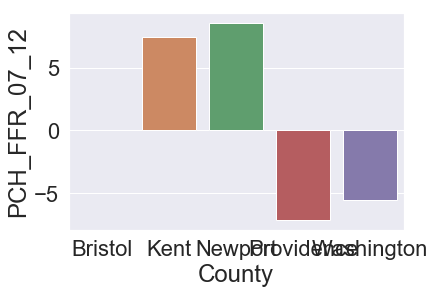

In [21]:
sns.set(font_scale=2, style='darkgrid') 
sns.barplot(x='County', y='PCH_FFR_07_12', data=df_RI)
#set_axis_labels("Population (Tens of Thousands)", "WIC participants (Thousands)"))

Looking more closely into Rhode Island it is interesting to see that in the 5 counties of Rhode Island the number of fast food resturant has reamined almost same. While increased in two counties, it decreased by almost similar amount in the other two while Bristol county did not show any changes in this category. This could be further invetigated using health and resturant data in other categories.

In [162]:
df1_2 = df1_new.groupby(['STABBR']).agg({'STABBR':['count'], 
                         'Income':'median'}) 
                         

In [163]:
df1_2.columns = [' '.join(col).strip() for col in df1_2.columns.values]

In [164]:
for col in df1_2.columns:
    df1_2[col] = df1_2[col].astype(str)

In [165]:
df1_2 = df1_2.reset_index()

In [166]:
df1_2.columns

Index(['STABBR', 'STABBR count', 'Income median'], dtype='object')

In [167]:
color_scl = [[0.1, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [168]:
data = [ dict(
        type='choropleth',
        colorscale = color_scl,
        autocolorscale = False,
        locations = df1_2['STABBR'],
        z = df1_2["Income median"].astype(float),
        locationmode = 'USA-states',
        text = '',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Median Income")
        ) ]

In [169]:
layout = dict(
        title = 'Median Income <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

In [170]:
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~hsingh29320/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


In [172]:
df1_3 = df1_2

In [173]:
df1_3['STABBR count'] = df1_3['STABBR count'].astype(int)
df1_3['Income median'] = df1_3['Income median'].astype(float)

In [174]:
df1_3.head()

,STABBR,STABBR count,Income median
0,AK,6,37350.0
1,AL,78,29250.0
2,AR,66,26700.0
3,AS,1,22300.0
4,AZ,93,29400.0


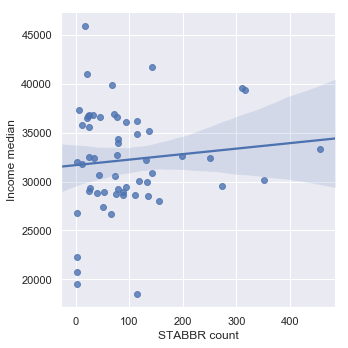

In [175]:
_ = sns.lmplot(x='STABBR count', y='Income median', data=df1_2)

In [18]:
# separating the first digit of Zip to divide schools according to regions from 0 to 9 as categories
df1['ZIP1'] = df1['ZIP'].map(lambda x: int(str(x)[:1]))

###### 

In [19]:
df1['ZIP1'].head()

0    3
1    3
2    3
3    3
4    3
Name: ZIP1, dtype: int64

In [20]:
#We developed a separate table using UNITID, name, city and state since these can only be used to identify school
schools = df1[['UNITID', 'INSTNM', 'CITY', 'STABBR']]

In [21]:
schools.head()

,UNITID,INSTNM,CITY,STABBR
0,100654,Alabama A & M University,Normal,AL
1,100663,University of Alabama at Birmingham,Birmingham,AL
2,100690,Amridge University,Montgomery,AL
3,100706,University of Alabama in Huntsville,Huntsville,AL
4,100724,Alabama State University,Montgomery,AL


In [22]:
#Select the columns that cant be used for model development: Zip, lat, long, opeid, opeid6, accreditor, school_url, price-calculator_url, repayment_date.median
#separation_date.median, alias, accreditor_code, title_iv.approval_date
other_columns = ['INSTNM', 'CITY','STABBR','OPEID', 'ST_FIPS', 'REGION', 'LOCALE', 'LOCALE2','OPEID6', 'ZIP','ACCREDAGENCY','LATITUDE', 'ALIAS','LONGITUDE', 'INSTURL','NPCURL','ACCREDCODE','T4APPROVALDATE']

In [23]:
#Drop the columns in list other_columns
df1.drop(other_columns, axis = 1, inplace =True)

In [24]:
#check shape of the dataframe
df1.shape

(7593, 159)

In [25]:
# checking the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7593 entries, 0 to 7592
Columns: 159 entries, UNITID to ZIP1
dtypes: float64(149), int64(10)
memory usage: 9.2 MB


In [26]:
#setting UNITID as the index
df1.set_index('UNITID', inplace=True)

In [27]:
#dropping rows those are null in the income column
Inc_null = df1.Income.isnull()

In [28]:
df2 = df1.dropna(subset=['Income'], how='all')

In [29]:
#checking for columns with less than 40 percent of null data
columns = df2.isnull().sum()/df2.shape[0]*100 < 40  

In [30]:
df3 = df2.loc[:,columns]

In [31]:
df3.head()

,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,...,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ICLEVEL,OPENADMP,Income,ZIP1
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,9366.0,17136.0,9657.0,7941.0,7017.0,0.7096,1,2.0,29900.0,3
100663,3.0,0,1,1,3,4,1,15.0,9.0,15.0,...,7766.0,17654.0,10263.0,17548.0,10221.0,0.9081,1,2.0,40200.0,3
100690,3.0,0,1,1,3,4,2,21.0,5.0,6.0,...,6900.0,6900.0,17071.0,7113.0,3217.0,1.0000,1,1.0,40100.0,3
100706,3.0,0,1,1,3,4,1,15.0,9.0,12.0,...,9128.0,20622.0,8917.0,10619.0,9514.0,0.6173,1,2.0,45600.0,3
100724,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,8720.0,15656.0,7717.0,7742.0,7940.0,0.6395,1,2.0,26700.0,3


In [32]:
#checking for nan values
np.where(np.isnan(df2))

(array([   0,    0,    0, ..., 5681, 5681, 5681], dtype=int64),
 array([ 19,  37,  38, ..., 152, 153, 155], dtype=int64))

In [33]:
#filling the null data with median
df3.fillna(df3.median(), inplace=True).head()

C:\Users\harshvardhan\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,...,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ICLEVEL,OPENADMP,Income,ZIP1
UNITID,,,,,,,,,,,,,,,,,,,,,
100654,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,9366.0,17136.0,9657.0,7941.0,7017.0,0.7096,1,2.0,29900.0,3
100663,3.0,0,1,1,3,4,1,15.0,9.0,15.0,...,7766.0,17654.0,10263.0,17548.0,10221.0,0.9081,1,2.0,40200.0,3
100690,3.0,0,1,1,3,4,2,21.0,5.0,6.0,...,6900.0,6900.0,17071.0,7113.0,3217.0,1.0000,1,1.0,40100.0,3
100706,3.0,0,1,1,3,4,1,15.0,9.0,12.0,...,9128.0,20622.0,8917.0,10619.0,9514.0,0.6173,1,2.0,45600.0,3
100724,3.0,0,1,1,3,4,1,18.0,10.0,13.0,...,8720.0,15656.0,7717.0,7742.0,7940.0,0.6395,1,2.0,26700.0,3


In [34]:
# Find columns (starts with 'PCIP')that represent percentage of students in different programs and those with less that 90% zeroes
PCIP_main =  []
for col in df2.columns:
    if (col[:4] ==  'PCIP') and (((df2[col] == 0).sum()/df2[col].count()) < 0.9):
        PCIP_main.append(col)
        
print(PCIP_main)

['PCIP01', 'PCIP03', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP26', 'PCIP27', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP40', 'PCIP42', 'PCIP43', 'PCIP44', 'PCIP45', 'PCIP46', 'PCIP47', 'PCIP48', 'PCIP50', 'PCIP51', 'PCIP52', 'PCIP54']


In [35]:
#Drop columns with more than 90% zero values
df4 = df3.drop(PCIP_main, axis =1)

In [36]:
#Specify y as response variable
y = df4['Income']

In [37]:
#Seperate predictor variables
X = df4.drop('Income', axis=1)

In [38]:
#intializing random forest regressor
clf = RandomForestRegressor()

In [39]:
# dataframe with just features that have a feature importance > .005 in the random forrest
sfm = SelectFromModel(clf, threshold=0.005)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
features = sfm.transform(X)

In [40]:
#Number of most important features
n_features

18

In [41]:
#Get indices of selected features
sfm.get_support(indices=True)

array([ 0,  3,  4,  6,  7,  8,  9, 24, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36], dtype=int64)

In [42]:
df5 = df4.iloc[:,sfm.get_support(indices=True)]

In [43]:
df5.describe()

,SCH_DEG,NUMBRANCH,PREDDEG,CONTROL,CCBASIC,CCUGPROF,CCSIZSET,PCIP49,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ICLEVEL,OPENADMP,Income
count,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000,5682.000000
mean,1.998416,8.898803,1.881204,2.079725,9.438050,4.618092,4.815910,0.007906,24841.648187,14128.023231,16933.383844,10318.165963,7516.398275,6365.685674,0.559107,1.724569,1.350229,33500.422386
std,0.858906,24.067041,0.975570,0.854787,10.482941,5.488964,5.647347,0.062685,10852.149585,9767.553784,8848.326199,7856.375276,9596.661897,1911.070702,0.234790,0.777019,0.477083,15444.584400
min,1.000000,1.000000,0.000000,1.000000,-3.000000,-2.000000,-2.000000,0.000000,4559.000000,580.000000,580.000000,0.000000,0.000000,1140.000000,0.000000,1.000000,1.000000,9100.000000
25%,1.000000,1.000000,1.000000,1.000000,-3.000000,-2.000000,-2.000000,0.000000,19955.750000,8061.250000,12975.000000,4766.250000,4026.750000,5515.250000,0.444550,1.000000,1.000000,24100.000000
50%,2.000000,1.000000,2.000000,2.000000,10.000000,4.000000,4.000000,0.000000,23413.000000,12672.000000,15352.000000,9352.000000,5998.000000,6168.000000,0.541100,2.000000,1.000000,31100.000000
75%,3.000000,4.000000,3.000000,3.000000,19.000000,10.000000,9.000000,0.000000,26781.750000,15675.000000,18048.000000,14020.750000,8426.750000,6869.750000,0.642850,2.000000,2.000000,39500.000000
max,3.000000,135.000000,4.000000,3.000000,33.000000,15.000000,18.000000,1.000000,67572.000000,53000.000000,53000.000000,147403.000000,393969.000000,26084.000000,1.000000,3.000000,2.000000,250000.000000


In [44]:
df5.columns

Index(['SCH_DEG', 'NUMBRANCH', 'PREDDEG', 'CONTROL', 'CCBASIC', 'CCUGPROF',
       'CCSIZSET', 'PCIP49', 'COSTT4_A', 'TUITIONFEE_IN', 'TUITIONFEE_OUT',
       'TUITFTE', 'INEXPFTE', 'AVGFACSAL', 'PFTFAC', 'ICLEVEL', 'OPENADMP',
       'Income'],
      dtype='object')

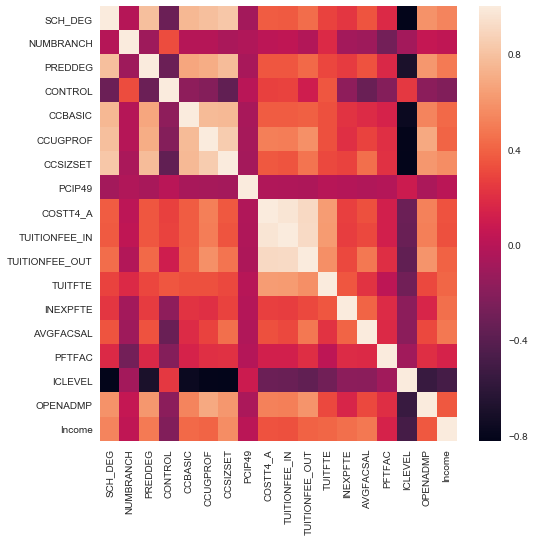

In [45]:
#checking covariance using heatmap
corr = df5.corr()
_ = plt.figure(figsize = (8,8))
_ = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

The heatmap above shows that average cost of attendance (COSTT4_A) and tution Fee (TUTIONFEE_IN) are highly correlated. So we can look into it more using scatter plot and regression line.

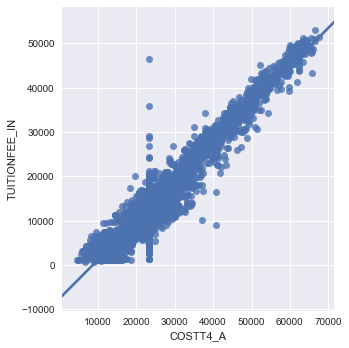

In [46]:
_ = sns.lmplot(x='COSTT4_A', y='TUITIONFEE_IN', data=df5)

The lmplot further confirms that both average cost of attendance are stronly correlated. This suggest that we can use one variable TUTIONFEE_IN to avoid multicollinearity.

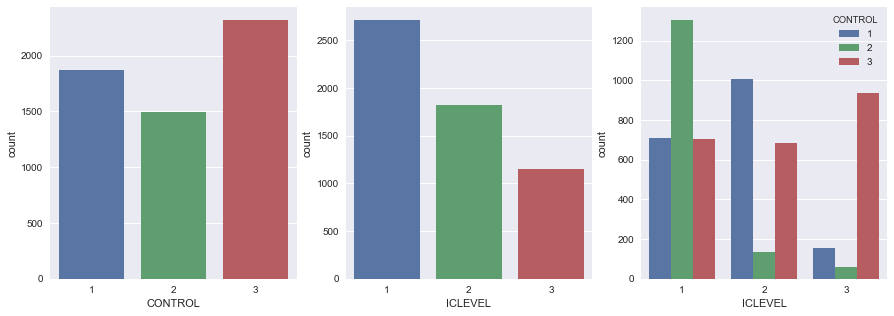

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(15,5))
_ = sns.countplot(x='CONTROL', data=df5, ax=ax1)
_ = sns.countplot(x='ICLEVEL', data=df5, orient="v", ax=ax2)
_ = sns.countplot(x='ICLEVEL', data=df5, hue='CONTROL', ax=ax3)

In the above count plots CONTROL variable represent control of institution (1:Public, 2:Private Non-profit, 3:Private for-profit), ICLEVEL represents level of instituion (1: 4-year, 2:2year, 3:less than 2years).

One of the things that can be noticed clearly from the above plots is that the number of intitutions offereing 4-year degree are higher than the other two categories. Another interesting observation from the 3rd plot is that colleges offering less than 2-year courses are mostly private institutions that are operated for profit.

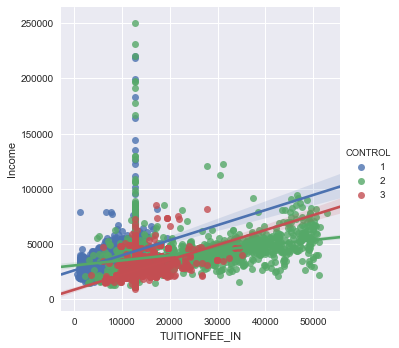

In [48]:
_ = sns.lmplot(x='TUITIONFEE_IN', y='Income', hue='CONTROL', data=df5)

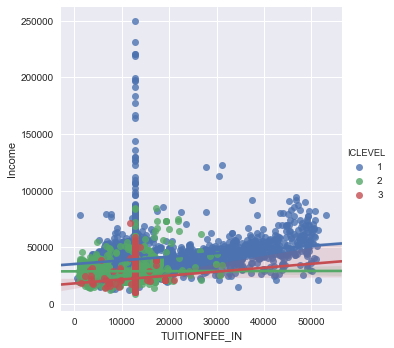

In [49]:
_ = sns.lmplot(x='TUITIONFEE_IN', y='Income', hue='ICLEVEL', data=df5)

From the above plots it is hard to tell if there are any clear trends between the tuition fee (instate) and Income for colleges under different controls (public or private) or different ICLEVEL. We do notice a group of colleges with same tuition fee having high variablity of income. Upon further investigation it was noticed that these are the colleges with missing tuition and were filled with median tuition.

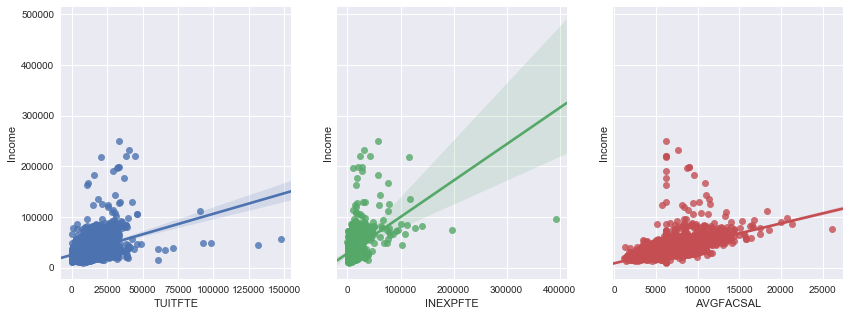

In [51]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(14,5))
_ = sns.regplot(x='TUITFTE', y='Income', data=df5, ax=ax1)
_ = sns.regplot(x='INEXPFTE', y='Income', data=df5, ax=ax2)
_ = sns.regplot(x='AVGFACSAL', y='Income',data=df5, ax=ax3)

It is interesting to see that there appears to be a positive correlation between average faculty salary (AVGFACSAL), Instructional expenditures per full-time equivalent student (INEXPFTE), Net tuition revenue per full-time equivalent student (TUITFTE),  and the median income. Which suggest if schools focus more on spending on the faculty and other instructional expenditures, the quality of education will be better resulting in students earning more salary after they graduate.

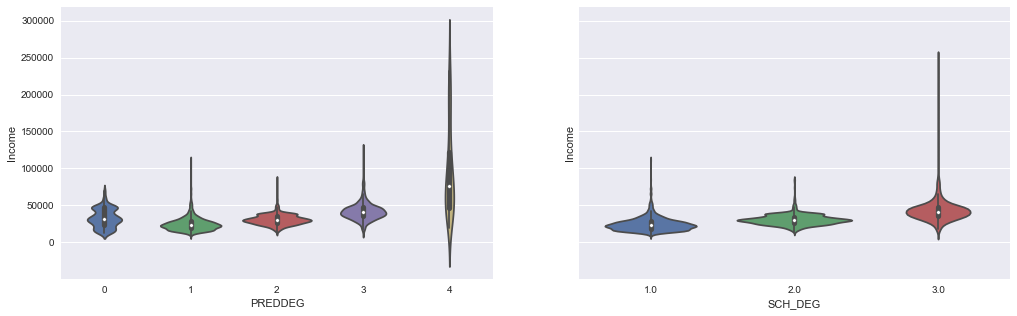

In [50]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True, figsize=(17,5))

_ = sns.violinplot(x='PREDDEG', y='Income', data=df5, ax=ax1)
_ = sns.violinplot(x='SCH_DEG', y='Income', data=df5, ax=ax2)


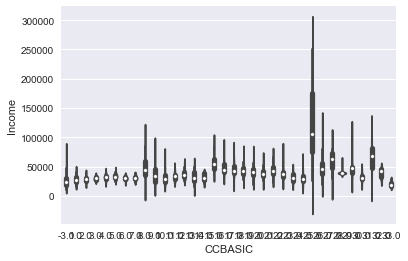

In [51]:
_ =sns.violinplot(x='CCBASIC', y='Income', data=df5)
_ =sns.set(rc={'figure.figsize':(18,5)})

The above plot shows the income spread for different colleges based on their carnegie classification. While most of the colleges does not show big differences in their median income salary, it is evident from the plot that average of the median salaries for students graduating from doctoral universities that focus more research is more than 100k.

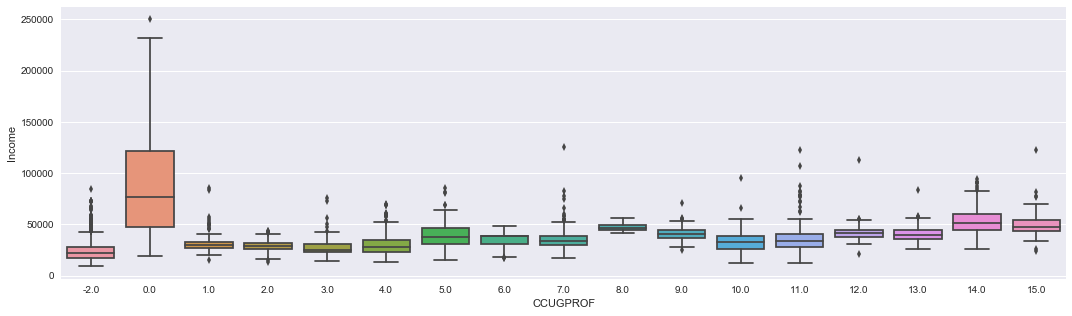

In [53]:
_ = sns.boxplot(x='CCUGPROF', y='Income',data=df5)
_ = sns.set(rc={'figure.figsize':(6,5)})

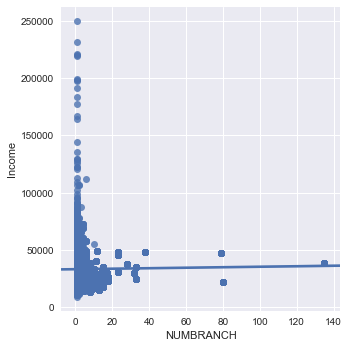

In [54]:
_ = sns.lmplot(x='NUMBRANCH', y='Income', data=df5)

Above plot reveals that there is group of colleges with 1 branch that have high variability of Income. Upon further investigation it was noticed that this group is for the colleges that had missing NUMBRANCH and were filled using the median.

So, we might have to drop this variable or fill the missing NUMBRANCH using a different criteria.

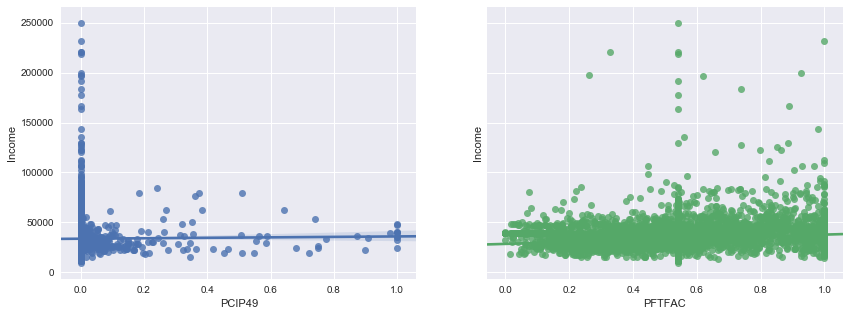

In [55]:
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey=True, figsize=(14,5))
_ = sns.regplot(x='PCIP49', y='Income', data=df5, ax=ax1)
_ = sns.regplot(x='PFTFAC', y='Income', data=df5, ax=ax2)

It was noticed that several colleges had missing or 0 PCIP values resulting in a group of colleges with high income variability. 

Also there was no clear trend between proportion of faculty that are permanent (PFTAC) and median income.

Inferential statistics.

    Check the collinearity between cost of attendance and tution fee

    Null hypothesis: Cost of attendance and tution fee are completely uncorrelated
    Alternate hypothesis: Cost of attendance and tution fee are correlated

In [56]:
#calculate observed pearson correlation coefficient: obs_r 
x = df5['COSTT4_A']
y = df5['TUITIONFEE_IN']
obs_r = np.corrcoef(x,y)[0,1]
print(obs_r)

0.968703429182


In [57]:
alpha = 0.05

In [58]:
#test the hypothesis 
#initialize the permutation replicates for correlation coefficients: per_coef
per_coef = np.empty(10000)

#draw replicates
for i in range(10000):
    #generate permutation for cost of admission: perm_cost
    perm_cost = np.random.permutation(x)
    
    #compute correlation coefficients for permuted costs and tution fee
    per_coef[i] = np.corrcoef(perm_cost, y)[0,1]
    
#calculate p-value
p_coef = np.sum(per_coef >= obs_r)/len(per_coef)

In [59]:
if p_coef <= alpha:
    print('We can reject the null hypothesis at alpha=0.05 with p-value = ' + str(p_coef))
else:
    print('We cannot reject the null hypothesis at alpha=0.05 with p-value = ' + str(p_coef))

We can reject the null hypothesis at alpha=0.05 with p-value = 0.0


From the above the hypothesis we can say that cost of attendance and tution fee are significantly correlated. Since the estimated r-square value is really high (approx 0.97) we can say that the correlation between cost of attendance and tution fee is also practically signifcant

    Null hypothesis: students from graduate level colleges have similar salaries to students from other colleges
    Alternate hypothesis: students from graduate level colleges have higher salaries compared to students from other colleges

In [60]:
#mean of salaries from all the colleges
obs_mean_all = np.mean(df5['Income'])
print(obs_mean_all)

33500.42238648363


In [61]:
#sepearte income of colleges offering predominantly graduate degrees and get there mean
df5_graduate = df5[df5['PREDDEG']==4]['Income']
df5_grad_mean = np.mean(df5_graduate)
print(df5_grad_mean)

94447.05882352941


In [62]:
#sepearte income of colleges offering predominantly other degrees and get there mean
df5_other_degrees = df5[df5['PREDDEG'] !=4]['Income']
df5_oth_mean = np.mean(df5_other_degrees)
print(df5_oth_mean)

32762.20163876024


In [63]:
#calculate empirical difference in mean
emp_mean_diff = df5_grad_mean - df5_oth_mean
print(emp_mean_diff)

61684.85718476917


In [64]:
#shift both the dataset to have similar mean
df5_grad_shifted = df5_graduate - df5_grad_mean + obs_mean_all
df5_oth_shifted = df5_other_degrees - df5_oth_mean + obs_mean_all

In [65]:
#bootstrap method to generate bootstrap replicates
def bs_rep(data, func, size=1):
    #initialize an empty array 
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_sample = np.random.choice(data, len(data))
        bs_replicates[i] = func(bs_sample)
    return bs_replicates

In [66]:
#draw bootstrap replicates of shifted means
bs_grad_shifted = bs_rep(df5_grad_shifted, np.mean, 10000)
bs_oth_shifted = bs_rep(df5_oth_shifted, np.mean, 10000)

In [67]:
#calculate differences in replicates
bs_diff_mean = bs_grad_shifted - bs_oth_shifted

In [68]:
#calculate p-value and compare with alpha
p = np.sum(bs_diff_mean >= emp_mean_diff)/len(bs_diff_mean)

if p <= alpha:
    print('We can reject the null hypothesis at alpha=0.05 with p-value = ' + str(p))
else:
    print('We cannot reject the null hypothesis at alpha=0.05 with p-value = ' + str(p))

We can reject the null hypothesis at alpha=0.05 with p-value = 0.0


In [69]:
#use stats package to double check the results
t1, p1 = stats.ttest_ind(df5_graduate, df5_other_degrees)

print(t1, p1)
if p1 <= alpha:
    print('We can reject the null hypothesis at alpha=0.05 with p-value = ' + str(p1))
else:
    print('We cannot reject the null hypothesis at alpha=0.05 with p-value = ' + str(p1))

36.3412954344 3.43478996627e-260
We can reject the null hypothesis at alpha=0.05 with p-value = 3.43478996627e-260


Both the bootstrap test and 2-sample ttest using stats package suggest that the salaries for students graduating from colleges offering graduate level degrees is significantly higher as compared to students graduating from other colleges. 
The empirical difference between the means is approx $61,685 suggesting that the difference is pratically significant as well.

    Check the normality of the Income data
        Null hypothesis: Income data is normally distributed
        Alternate hypothesis: Income data is not normally distributed

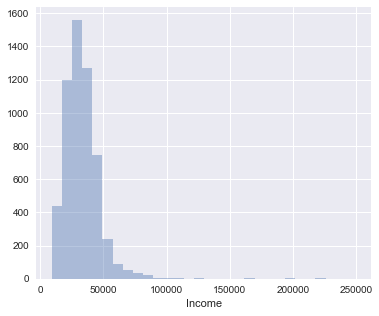

In [70]:
#draw a histogram to check the distribution of income
_ = sns.distplot(df5['Income'], bins=30, kde=False)

In [71]:
#plot the ecdf of observed data and compare it with the theoritical ecdf
#define function to calculate x and y variables for plotting ecdf

def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1)/len(data)
    return x, y

In [72]:
#x and y for plotting ecdf of observed data
x_obs, y_obs = ecdf(df5.Income)

In [73]:
#estimate x and y for theoritical samples for ecdf
mean = np.mean(df5.Income)
std = np.std(df5.Income)
samples = np.random.normal(mean, std, 10000)

x_theo, y_theo = ecdf(samples)

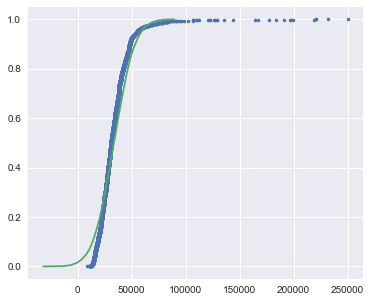

In [74]:
#plot ecdfs using the actual and theoritical observations 
_ = plt.plot(x_obs, y_obs, marker='.', linestyle='none')
_ = plt.plot(x_theo, y_theo)

In [75]:
chi, p_income = stats.chisquare(df5.Income)
print(chi, p_income)

40450785.4663 0.0


In [76]:
if p_income <= alpha:
    print('We can reject the null hypothesis at alpha=0.05 with p-value = ' + str(p_income))
else:
    print('We cannot reject the null hypothesis at alpha=0.05 with p-value = ' + str(p_income))

We can reject the null hypothesis at alpha=0.05 with p-value = 0.0


Both graphically and chi square test suggest that the data is not normally distributed. The plots also suggest that while the data in the middle follow a normal trend. The income for colleges at the extreme low and high ends deviate the plot from being normally distributed.

In [77]:
#get log of income data
log_inc = np.log(df5.Income)

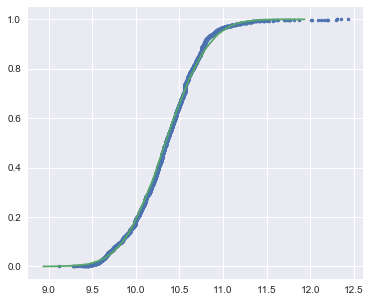

In [78]:
#plot ecdf for log of Income
x_log, y_log = ecdf(log_inc)
x_theo_log, y_theo_log = ecdf(np.random.normal(np.mean(log_inc), np.std(log_inc), 10000))

_ = plt.plot(x_log, y_log, marker='.', linestyle='none')
_ = plt.plot(x_theo_log, y_theo_log)

In [79]:
#chi square test to check normality of lof of income
chi1, p_log_inc = stats.chisquare(log_inc)
print(chi1, p_log_inc)

81.1668617712 1.0


Both the ecdf plots and chi-square test suggest that Income data is normally distributed after log transformation.

Developing Random Forest Regressor and Elastic Net Models using Grid Search method and comparing the model performances

In [80]:
#specify independent and response/dependent variable: X, y
X = df5.drop('Income', axis=1)
y = df5.Income

In [81]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [82]:
#Instantiate Random Forest Regressor: regr
regr = RandomForestRegressor()

In [86]:
#Specify range of hyperparameters to be tested using Grid Search
parameters = {"max_depth": list(range(1,10))
              , "min_samples_split": [50,100,200]
              , "n_estimators": list(range(1,5))
              , "max_features": list(range(2,18))  }

In [87]:
# Instantiate the GridSearchCV object: regr_cv
regr_cv =  GridSearchCV(regr, parameters, cv=5)

In [88]:
#Fit the model to training data
regr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [50, 100, 200], 'n_estimators': [1, 2, 3, 4], 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [89]:
print("Tuned Random Forest Regressor Parameters: {}".format(regr_cv.best_params_))
print("Best Score is: {}".format(regr_cv.best_score_))

Tuned Random Forest Regressor Parameters: {'max_depth': 9, 'max_features': 10, 'min_samples_split': 50, 'n_estimators': 4}
Best Score is: 0.623650844066469


In [92]:
#Test the model on test dataset
y_pred = regr_cv.predict(X_test)

In [94]:
print("R^2: {}".format(regr_cv.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6137522937253218
Root Mean Squared Error: 10124.94860160248


The results show that Random Forest Regressor does a decent job in predicting the Income with an R-square of almost 0.61

In [104]:
#Instantiate Elastic Net: elastic_net
elastic_net = ElasticNet(selection = 'random')

In [105]:
#Specify range of hyperparameter to be tested using Grid Search
param_en = {"l1_ratio": np.linspace(0, 1, 30)}

In [106]:
# Instantiate the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_en, cv=5)

In [107]:
#Fit the model
gm_cv.fit(X_train, y_train)

C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='random', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'l1_ratio': array([ 0.     ,  0.03448,  0.06897,  0.10345,  0.13793,  0.17241,
        0.2069 ,  0.24138,  0.27586,  0.31034,  0.34483,  0.37931,
        0.41379,  0.44828,  0.48276,  0.51724,  0.55172,  0.58621,
        0.62069,  0.65517,  0.68966,  0.72414,  0.75862,  0.7931 ,
        0.82759,  0.86207,  0.89655,  0.93103,  0.96552,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [109]:
#Test the model on test dataset
y_pred_net = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_net)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.5220852175641312
Tuned ElasticNet MSE: 126844080.62861225


Although the Elastic Net model did perform well with R2 of 0.52, its performance was less compared to the Random Forest Regressor

Scaling the data and applying the models again using Pipeline

In [110]:
#Setup pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('regr_sc' , RandomForestRegressor())]

In [111]:
#Instantiate the pipeline
pipeline_regr = Pipeline(steps)

In [118]:
#Specify range for hyperparameters: parameters_reg
parameters_reg = {"regr_sc__max_depth": list(range(1,10))
              , "regr_sc__min_samples_split": [50,100,200]
              , "regr_sc__n_estimators": list(range(1,5))
              , "regr_sc__max_features": list(range(2,18))  }

In [119]:
#Random Forest Regressor after standard scaling: regr_cv_sc
regr_cv_sc =  GridSearchCV(pipeline_regr, param_grid=parameters_reg)

In [121]:
#Fit the model
regr_cv_sc.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr_sc', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity...imators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'regr_sc__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'regr_sc__min_samples_split': [50, 100, 200], 'regr_sc__n_estimators': [1, 2, 3, 4], 'regr_sc__max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [122]:
print("Tuned Random Forest Regressor Parameters: {}".format(regr_cv_sc.best_params_))
print("Best Score is: {}".format(regr_cv_sc.best_score_))

Tuned Random Forest Regressor Parameters: {'regr_sc__max_depth': 8, 'regr_sc__max_features': 12, 'regr_sc__min_samples_split': 50, 'regr_sc__n_estimators': 4}
Best Score is: 0.6193154477574924


In [123]:
y_pred_reg = regr_cv_sc.predict(X_test)

In [124]:
print("R^2: {}".format(regr_cv_sc.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_reg))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.6469943886403245
Root Mean Squared Error: 9679.449871591261


The results show that after scaling the Random Forest Regression model is performing better. The R-square increased from almost 0.59 to 0.65 and RMSE decreased from  10175.75 to 9679.449

Scaling the data and applying the Elastic Net model again using Pipeline

In [125]:
#Setup pipeline steps: steps
steps_en = [('scaler', StandardScaler()),
        ('elastic_net_sc' , ElasticNet())]

In [126]:
#Instantiate the pipeline
pipeline_en = Pipeline(steps_en)

In [127]:
# Specify the hyperparameter space
param_en_sc = {'elastic_net_sc__l1_ratio':np.linspace(0,1,30)}

In [128]:
#ElasticNet after standard scaling: elastic_cv_sc
elastic_cv_sc =  GridSearchCV(pipeline_en, param_grid=param_en_sc, cv=5)

In [129]:
#Fit the model
elastic_cv_sc.fit(X_train, y_train)

C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\harshvardhan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not conver

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elastic_net_sc', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'elastic_net_sc__l1_ratio': array([ 0.     ,  0.03448,  0.06897,  0.10345,  0.13793,  0.17241,
        0.2069 ,  0.24138,  0.27586,  0.31034,  0.34483,  0.37931,
        0.41379,  0.44828,  0.48276,  0.51724,  0.55172,  0.58621,
        0.62069,  0.65517,  0.68966,  0.72414,  0.75862,  0.7931 ,
        0.82759,  0.86207,  0.89655,  0.93103,  0.96552,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [131]:
y_pred_net_sc = elastic_cv_sc.predict(X_test)
r2 = elastic_cv_sc.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred_net_sc)
print("Tuned ElasticNet l1 ratio: {}".format(elastic_cv_sc.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'elastic_net_sc__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.522020504445615
Tuned ElasticNet MSE: 126861256.2346501


The comparison between Random Forest Regressor and Elastic Net model shows that Random Forest Regressor was able to develop better model with higher R-square and much lower RMSE as compared to Elastic Net model. Standardizing Income data by taking log further improve the performance of Random Forest Regressor model.

In [133]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [134]:
print (__version__)

3.0.0


In [135]:
init_notebook_mode(connected=True)

In [136]:
#import plotly.plotly as py
import plotly.graph_objs as go

In [6]:
color_scl = [[0.1, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

In [319]:
us_pop_1 =  dict(
        
        geo = 'geo',
        showlegend= False,
        type='choropleth',
        showscale = False,
        colorscale = color_scl,
        autocolorscale = False,
        locations = df_code['code'],
        z = df["State Population, 2009"].astype(float),
        locationmode = 'USA-states',
        text = '',
        marker = dict(
            line = dict (
            color = 'rgb(255,255,255)',
                
             )),
        
        colorbar = dict(
            title = "Population 2009"),
        
        ) 
us_pop_2 =  dict(
        
        geo = 'geo2',
        showlegend= False,
        type='choropleth',
        colorscale = color_scl,
        autocolorscale = False,
        locations = df_code['code'],
        z = df["State Population,  2014"].astype(float),
        locationmode = 'USA-states',
        text = '',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                
            )), 
            
        
        #colorbar = dict(
            #title = "Population 2010")
        ) 
'''
us_pop_3 =  dict(
        
        geo = 'geo3',
        showscale= False,
        type='choropleth',
        colorscale = color_scl,
        autocolorscale = False,
        locations = df_code['code'],
        z = df["State Population,  2011"].astype(float),
        locationmode = 'USA-states',
        text = '',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                
            )), 
        ) 
us_pop_4 =  dict(
        
        geo = 'geo4',
        showscale= False,
        type='choropleth',
        colorscale = color_scl,
        autocolorscale = False,
        locations = df_code['code'],
        z = df["State Population, 2012"].astype(float),
        locationmode = 'USA-states',
        text = '',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                
            )), 
        )
'''

'\nus_pop_3 =  dict(\n        \n        geo = \'geo3\',\n        showscale= False,\n        type=\'choropleth\',\n        colorscale = color_scl,\n        autocolorscale = False,\n        locations = df_code[\'code\'],\n        z = df["State Population,  2011"].astype(float),\n        locationmode = \'USA-states\',\n        text = \'\',\n        marker = dict(\n            line = dict (\n                color = \'rgb(255,255,255)\',\n                \n            )), \n        ) \nus_pop_4 =  dict(\n        \n        geo = \'geo4\',\n        showscale= False,\n        type=\'choropleth\',\n        colorscale = color_scl,\n        autocolorscale = False,\n        locations = df_code[\'code\'],\n        z = df["State Population, 2012"].astype(float),\n        locationmode = \'USA-states\',\n        text = \'\',\n        marker = dict(\n            line = dict (\n                color = \'rgb(255,255,255)\',\n                \n            )), \n        )\n'

In [320]:
data = [us_pop_1, us_pop_2]

In [340]:
layout = {
  "showlegend":False,  
  "autosize": False, 
   
  "geo": {
      
    "domain": {
      "x": [0.0, 0.5], 
      "y": [0.0, 1.0]
    }, 
    "landcolor": "rgb(229, 229, 229)", 
    "scope": "usa", 
    "showcountries": False, 
    "showland": True, 
    "subunitcolor": "rgb(255, 255, 255)",
    
  }, 
  "geo2": {
    "domain": {
      "x": [0.5, 1.0], 
      "y": [0.0, 1.0]
    }, 
    "landcolor": "rgb(229, 229, 229)", 
    "scope": "usa", 
    "showcountries": False, 
    "showland": True, 
    "subunitcolor": "rgb(255, 255, 255)"
  },
    "title": "US Population in 2009 and 2014"
    
   
}

In [341]:
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [159]:
trace1 = go.Scatter(
    x=[1, 2, 3],
    y=[2, 3, 4]
)
trace2 = go.Scatter(
    x=[20, 30, 40],
    y=[5, 5, 5],
    xaxis='x2',
    yaxis='y'
)
trace3 = go.Scatter(
    x=[2, 3, 4],
    y=[600, 700, 800],
    xaxis='x',
    yaxis='y3'
)
trace4 = go.Scatter(
    x=[4000, 5000, 6000],
    y=[7000, 8000, 9000],
    xaxis='x4',
    yaxis='y4'
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='shared-axes-subplots')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 8))



TypeError: 'str' object is not callable